In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./forestfires.csv")

In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
import matplotlib.pyplot as plt

array([[&lt;AxesSubplot:title={&#39;center&#39;:&#39;X&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;Y&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;FFMC&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;DMC&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;DC&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;ISI&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;temp&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;RH&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;wind&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;rain&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;area&#39;}&gt;, &lt;AxesSubplot:&gt;]],
      dtype=object)

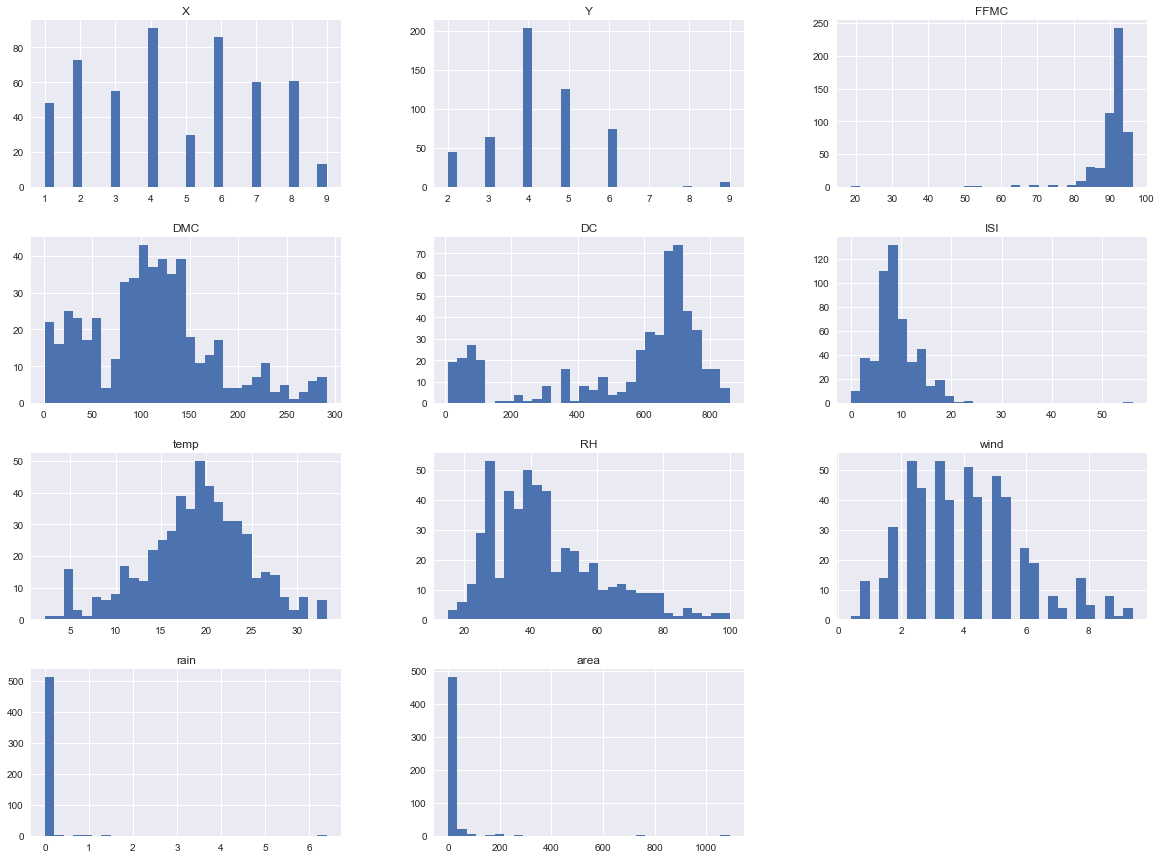

In [7]:
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))

In [8]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
features = ['temp', 'RH',  'rain']
find = ['area']

X = df[features]
y = df[find]

In [11]:
y.head(5)

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [15]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
# models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
# models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.010462 (19.194908)
Ridge: 0.010462 (19.193902)
Lasso: 0.010358 (19.134611)
ElasticNet: 0.010359 (19.139638)
RandomForest: 0.831787 (7.986170)
KNN: 0.222535 (15.796031)
SVM: 0.000844 (12.791797)
